In [40]:
import os
from os import listdir
import pandas as pd
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/
os. getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


'/content/drive/My Drive'

In [42]:
#Chart Display
import matplotlib.pyplot as plt 
import matplotlib.style as style
style.use('dark_background')

In [43]:
import datetime as dt
def convert_dt(df,col_name=None,year=True,month=True):
    df[col_name] = pd.to_datetime(df[col_name])
    
    df['plot_date'] = pd.to_datetime(df[col_name].dt.strftime('%Y-%m-%d'))
    df['agg_date'] = df[col_name].dt.strftime('%m%d%Y')

    if year:
        df['year'] = df['agg_date'].str[-4:]
    if month:
        df['month'] = df['agg_date'].str[0:2]
        df = df.astype({'month': 'int64'})
    
    df = df.drop(columns='agg_date')
    return df

def get_month_season(df):
    df_month = pd.read_csv('UMBC_Energy/Universal_Data/months.csv')
    df = df.merge(df_month,on='month',how='left')
    df = df.astype({'month': 'object'})
    return df

# We believe we can use daily weather and MW usage trends to predict MW outage on the PJM Grid

PJM 180 gigawatts
More than 1,000 companies are members of PJM, which serves 65 million customers and has 180 gigawatts of generating capacity. With 1,376 generation sources, 84,236 miles (135,560 km) of transmission lines and 6,038 transmission substations, PJM delivered 807 terawatt-hours of electricity in 2018.

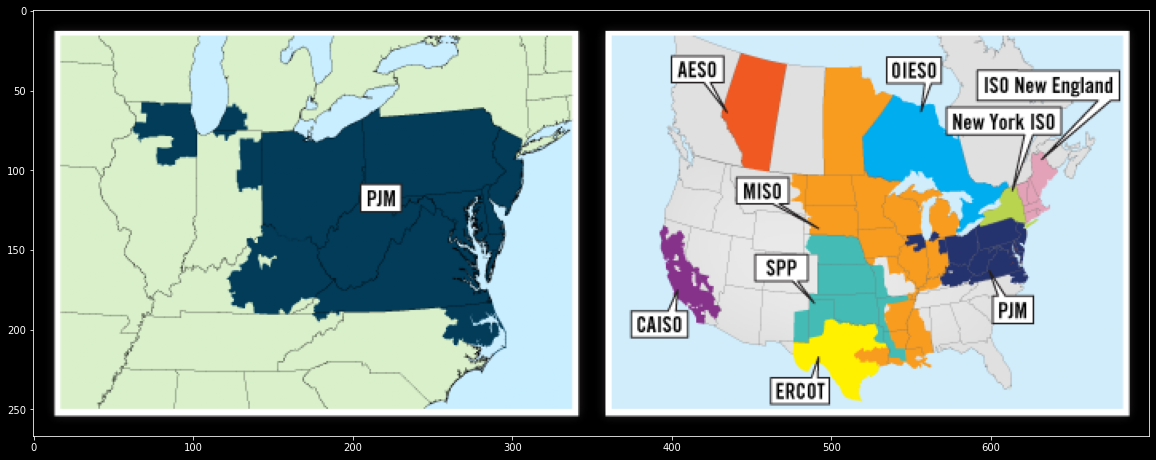

In [44]:
img_path = 'UMBC_Energy/Images/PJM.png'
img_p = plt.imread(img_path)
plt.figure(figsize=(20,10))
plt.imshow(img_p)

# NOAA Weather Data

##NOAA Features

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)


SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

AWND = Wind

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)


TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file


TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

##Created features

TDIFF = TMAX - TMIN

In [45]:
df_NOAA = pd.read_csv('UMBC_Energy/Raw/Raw_All_NOAA.csv',sep='|')
df_NOAA = df_NOAA[df_NOAA.datacoverage >= .99].sort_index(ascending=True)
df_NOAA = convert_dt(df_NOAA,'date')
df_NOAA = get_month_season(df_NOAA)
df_NOAA['TDIFF'] = df_NOAA['TMAX'] - df_NOAA['TMIN']
df_NOAA


,station_dt_key,date,station,PRCP,SNOW,SNWD,AWND,TMAX,TMIN,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude,state,location_type,location,State,Code,plot_date,year,month,month_name,season,TDIFF
0,GHCND:US1DEKN0001_2015-01-01,2015-01-01,GHCND:US1DEKN0001,0.0,0.0,NaN,NaN,NaN,NaN,9.8,2009-09-01,2020-06-22,39.03257,"FELTON 3.6 NE, DE US",0.9991,GHCND:US1DEKN0001,METERS,-75.516933,Delaware,GHCND,US1DEKN0001,Delaware,DE,2015-01-01,2015,1,Jan,Winter,NaN
1,GHCND:USC00283662_2015-01-01,2015-01-01,GHCND:USC00283662,0.0,0.0,0.0,NaN,32.0,19.0,38.1,1893-01-01,2020-07-19,39.64415,"HAMMONTON 1 NE, NJ US",1.0000,GHCND:USC00283662,METERS,-74.804780,New Jersey,GHCND,USC00283662,New Jersey,NJ,2015-01-01,2015,1,Jan,Winter,13.0
2,GHCND:USC00442635_2015-01-01,2015-01-01,GHCND:USC00442635,0.0,NaN,NaN,NaN,41.0,27.0,3.0,1909-11-01,2015-10-01,37.38760,"EASTVILLE, VA US",1.0000,GHCND:USC00442635,METERS,-75.974400,Virginia,GHCND,USC00442635,Virginia,VA,2015-01-01,2015,1,Jan,Winter,14.0
3,GHCND:USC00440327_2015-01-01,2015-01-01,GHCND:USC00440327,0.0,0.0,0.0,NaN,46.0,22.0,67.1,1893-01-01,2020-07-18,37.75000,"ASHLAND, VA US",1.0000,GHCND:USC00440327,METERS,-77.483300,Virginia,GHCND,USC00440327,Virginia,VA,2015-01-01,2015,1,Jan,Winter,24.0
4,GHCND:USC00366233_2015-01-01,2015-01-01,GHCND:USC00366233,0.0,0.0,0.0,NaN,30.0,17.0,251.5,1892-05-01,2020-01-31,41.01720,"NEW CASTLE 1 N, PA US",1.0000,GHCND:USC00366233,METERS,-80.361500,Pennsylvania,GHCND,USC00366233,Pennsylvania,PA,2015-01-01,2015,1,Jan,Winter,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210227,GHCND:USC00461220_2020-07-06,2020-07-06,GHCND:USC00461220,0.0,0.0,0.0,NaN,95.0,64.0,443.5,1888-01-01,2020-07-19,38.98030,"BUCKHANNON, WV US",1.0000,GHCND:USC00461220,METERS,-80.220100,West Virginia,GHCND,USC00461220,West Virginia,WV,2020-07-06,2020,7,Jul,Summer,31.0
210228,GHCND:USC00338822_2020-07-06,2020-07-06,GHCND:USC00338822,0.0,0.0,0.0,NaN,93.0,65.0,228.6,1893-02-01,2020-07-19,41.51830,"WAUSEON WATER PLANT, OH US",1.0000,GHCND:USC00338822,METERS,-84.145200,Ohio,GHCND,USC00338822,Ohio,OH,2020-07-06,2020,7,Jul,Summer,28.0
210229,GHCND:USC00361920_2020-07-06,2020-07-06,GHCND:USC00361920,0.0,0.0,0.0,NaN,95.0,67.0,131.1,1840-02-01,2020-07-19,40.22580,"CARLISLE WATER PLANT, PA US",1.0000,GHCND:USC00361920,METERS,-77.189400,Pennsylvania,GHCND,USC00361920,Pennsylvania,PA,2020-07-06,2020,7,Jul,Summer,28.0
210230,GHCND:USC00361485_2020-07-06,2020-07-06,GHCND:USC00361485,NaN,NaN,0.0,NaN,90.0,57.0,317.0,1884-11-01,2020-07-16,41.19220,"CLARION 3 SW, PA US",1.0000,GHCND:USC00361485,METERS,-79.436100,Pennsylvania,GHCND,USC00361485,Pennsylvania,PA,2020-07-06,2020,7,Jul,Summer,33.0


Text(0, 0.5, 'Frequency')

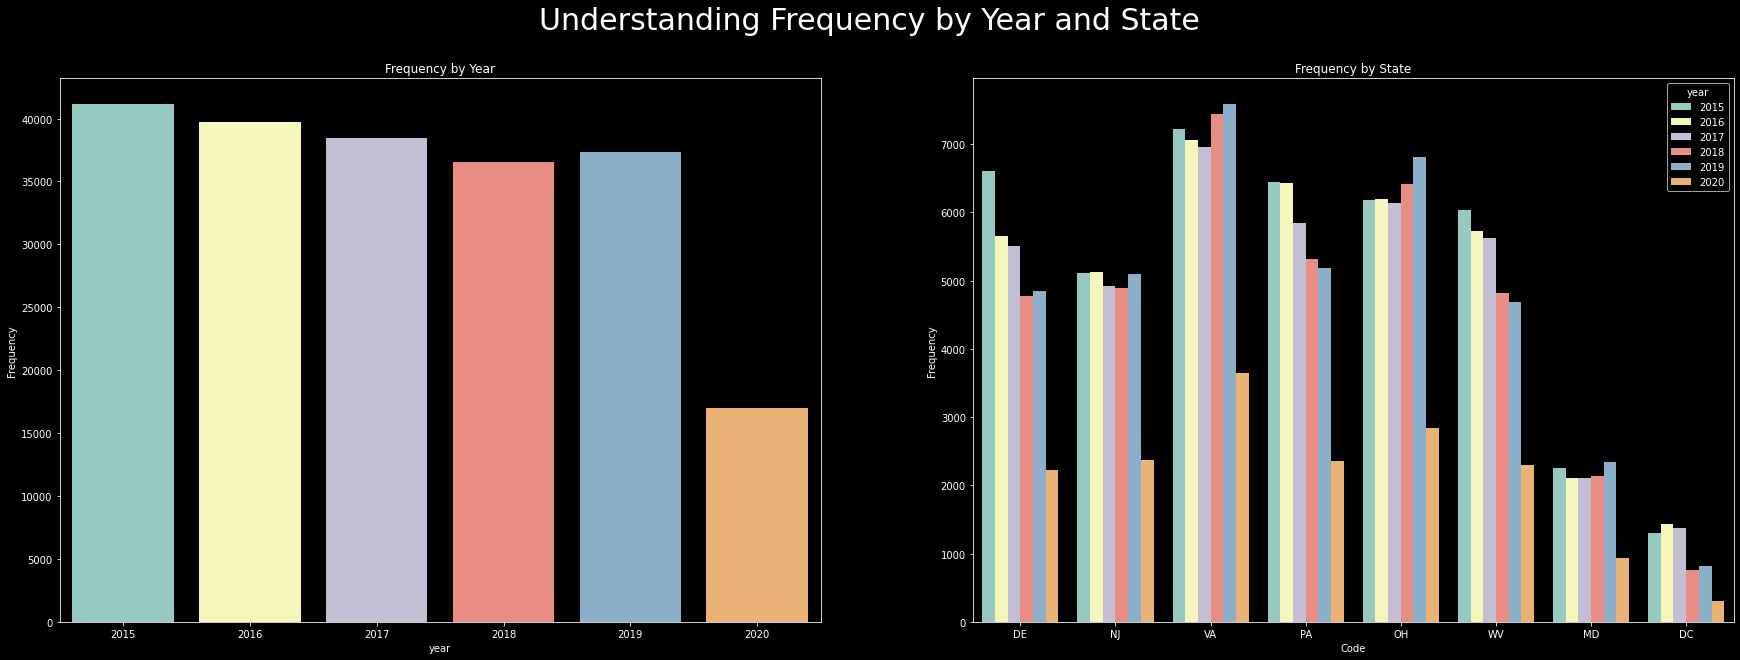

In [46]:
f, axes = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Understanding Frequency by Year and State', fontsize=30)

ax = sns.countplot(x="year", data=df_NOAA,ax=axes[0])
ax.set_title('Frequency by Year')
ax.set_ylabel('Frequency')


ax = sns.countplot(x="Code", data=df_NOAA,hue='year',ax=axes[1])
ax.set_title('Frequency by State')
ax.set_ylabel('Frequency')



In [47]:
df_NOAA['Code_station'] = df_NOAA['station'] + df_NOAA['Code']

In [48]:
df_NOAA.head()

,station_dt_key,date,station,PRCP,SNOW,SNWD,AWND,TMAX,TMIN,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude,state,location_type,location,State,Code,plot_date,year,month,month_name,season,TDIFF,Code_station
0,GHCND:US1DEKN0001_2015-01-01,2015-01-01,GHCND:US1DEKN0001,0.0,0.0,NaN,NaN,NaN,NaN,9.8,2009-09-01,2020-06-22,39.03257,"FELTON 3.6 NE, DE US",0.9991,GHCND:US1DEKN0001,METERS,-75.516933,Delaware,GHCND,US1DEKN0001,Delaware,DE,2015-01-01,2015,1,Jan,Winter,NaN,GHCND:US1DEKN0001DE
1,GHCND:USC00283662_2015-01-01,2015-01-01,GHCND:USC00283662,0.0,0.0,0.0,NaN,32.0,19.0,38.1,1893-01-01,2020-07-19,39.64415,"HAMMONTON 1 NE, NJ US",1.0000,GHCND:USC00283662,METERS,-74.804780,New Jersey,GHCND,USC00283662,New Jersey,NJ,2015-01-01,2015,1,Jan,Winter,13.0,GHCND:USC00283662NJ
2,GHCND:USC00442635_2015-01-01,2015-01-01,GHCND:USC00442635,0.0,NaN,NaN,NaN,41.0,27.0,3.0,1909-11-01,2015-10-01,37.38760,"EASTVILLE, VA US",1.0000,GHCND:USC00442635,METERS,-75.974400,Virginia,GHCND,USC00442635,Virginia,VA,2015-01-01,2015,1,Jan,Winter,14.0,GHCND:USC00442635VA
3,GHCND:USC00440327_2015-01-01,2015-01-01,GHCND:USC00440327,0.0,0.0,0.0,NaN,46.0,22.0,67.1,1893-01-01,2020-07-18,37.75000,"ASHLAND, VA US",1.0000,GHCND:USC00440327,METERS,-77.483300,Virginia,GHCND,USC00440327,Virginia,VA,2015-01-01,2015,1,Jan,Winter,24.0,GHCND:USC00440327VA
4,GHCND:USC00366233_2015-01-01,2015-01-01,GHCND:USC00366233,0.0,0.0,0.0,NaN,30.0,17.0,251.5,1892-05-01,2020-01-31,41.01720,"NEW CASTLE 1 N, PA US",1.0000,GHCND:USC00366233,METERS,-80.361500,Pennsylvania,GHCND,USC00366233,Pennsylvania,PA,2015-01-01,2015,1,Jan,Winter,13.0,GHCND:USC00366233PA


# df_NOAA_Loco Selection Criteria:

1. Select at the most 6 stations from each state
2. Sort on amount of occurences 
3. Search for stations with all features filled with values similar to top occurence stations.  More features with a value is selected

##NOAA Features

PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)


SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)

AWND = Wind

SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)


TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file


TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

##Created features

TDIFF = TMAX - TMIN

In [49]:
## Having Trouble Plotting this Merged Subset.  This data features many times in the notebook

In [50]:
df_NOAA_loco = pd.read_csv('UMBC_Energy/Raw/Raw_Station_Location.csv',sep=',')
df_NOAA_loco_visual = df_NOAA_loco.merge(df_NOAA,left_on = ['Key','Code','station'],right_on=['Code_station','Code','station'],how='left')
df_NOAA_loco_visual = df_NOAA_loco_visual.sort_values('plot_date',ascending=True)
df_NOAA_loco_visual

,station,Code,Key,station_dt_key,date,PRCP,SNOW,SNWD,AWND,TMAX,TMIN,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude,state,location_type,location,State,plot_date,year,month,month_name,season,TDIFF,Code_station
0,GHCND:USC00182325,DC,GHCND:USC00182325DC,GHCND:USC00182325_2015-01-01,2015-01-01,0.00,0.0,0.0,NaN,36.0,21.0,45.7,1948-08-01,2020-03-31,38.93850,"DALECARLIA RESERVOIR, DC US",1.0,GHCND:USC00182325,METERS,-77.11340,District of Columbia,GHCND,USC00182325,District of Columbia,2015-01-01,2015,1,Jan,Winter,15.0,GHCND:USC00182325DC
44130,GHCND:USC00361920,PA,GHCND:USC00361920PA,GHCND:USC00361920_2015-01-01,2015-01-01,0.00,0.0,0.0,NaN,33.0,13.0,131.1,1840-02-01,2020-07-19,40.22580,"CARLISLE WATER PLANT, PA US",1.0,GHCND:USC00361920,METERS,-77.18940,Pennsylvania,GHCND,USC00361920,Pennsylvania,2015-01-01,2015,1,Jan,Winter,20.0,GHCND:USC00361920PA
46141,GHCND:USC00363632,PA,GHCND:USC00363632PA,GHCND:USC00363632_2015-01-01,2015-01-01,0.00,0.0,0.0,NaN,30.0,14.0,112.5,1894-01-01,2020-07-19,40.55156,"HAMBURG, PA US",1.0,GHCND:USC00363632,METERS,-75.99105,Pennsylvania,GHCND,USC00363632,Pennsylvania,2015-01-01,2015,1,Jan,Winter,16.0,GHCND:USC00363632PA
48155,GHCND:USC00367409,PA,GHCND:USC00367409PA,GHCND:USC00367409_2015-01-01,2015-01-01,0.00,0.0,0.0,NaN,27.0,15.0,201.2,1895-01-01,2020-07-19,41.32990,"RENOVO, PA US",1.0,GHCND:USC00367409,METERS,-77.73810,Pennsylvania,GHCND,USC00367409,Pennsylvania,2015-01-01,2015,1,Jan,Winter,12.0,GHCND:USC00367409PA
50169,GHCND:USC00367477,PA,GHCND:USC00367477PA,GHCND:USC00367477_2015-01-01,2015-01-01,0.00,0.0,0.0,NaN,22.0,15.0,414.5,1893-01-01,2020-07-19,41.41960,"RIDGWAY, PA US",1.0,GHCND:USC00367477,METERS,-78.74921,Pennsylvania,GHCND,USC00367477,Pennsylvania,2015-01-01,2015,1,Jan,Winter,7.0,GHCND:USC00367477PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26070,GHCND:USC00283662,NJ,GHCND:USC00283662NJ,GHCND:USC00283662_2020-07-06,2020-07-06,0.09,0.0,0.0,NaN,93.0,69.0,38.1,1893-01-01,2020-07-19,39.64415,"HAMMONTON 1 NE, NJ US",1.0,GHCND:USC00283662,METERS,-74.80478,New Jersey,GHCND,USC00283662,New Jersey,2020-07-06,2020,7,Jul,Summer,24.0,GHCND:USC00283662NJ
46140,GHCND:USC00361920,PA,GHCND:USC00361920PA,GHCND:USC00361920_2020-07-06,2020-07-06,0.00,0.0,0.0,NaN,95.0,67.0,131.1,1840-02-01,2020-07-19,40.22580,"CARLISLE WATER PLANT, PA US",1.0,GHCND:USC00361920,METERS,-77.18940,Pennsylvania,GHCND,USC00361920,Pennsylvania,2020-07-06,2020,7,Jul,Summer,28.0,GHCND:USC00361920PA
42145,GHCND:USC00338822,OH,GHCND:USC00338822OH,GHCND:USC00338822_2020-07-06,2020-07-06,0.00,0.0,0.0,NaN,93.0,65.0,228.6,1893-02-01,2020-07-19,41.51830,"WAUSEON WATER PLANT, OH US",1.0,GHCND:USC00338822,METERS,-84.14520,Ohio,GHCND,USC00338822,Ohio,2020-07-06,2020,7,Jul,Summer,28.0,GHCND:USC00338822OH
28084,GHCND:USC00288644,NJ,GHCND:USC00288644NJ,GHCND:USC00288644_2020-07-06,2020-07-06,0.00,0.0,0.0,NaN,90.0,62.0,203.3,1893-01-01,2020-07-19,41.22140,"SUSSEX 3 WNW, NJ US",1.0,GHCND:USC00288644,METERS,-74.66261,New Jersey,GHCND,USC00288644,New Jersey,2020-07-06,2020,7,Jul,Summer,28.0,GHCND:USC00288644NJ


Text(0.5, 1.0, 'WV')

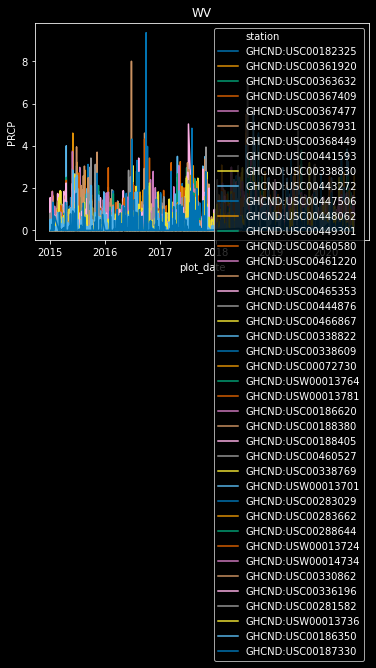

In [51]:
sns.lineplot(x='plot_date',y='PRCP',data=df_NOAA_loco_visual,hue='station',palette='colorblind').set_title('WV')

In [52]:
df_NOAA_loco_visual.nunique()

station              41
Code                  8
Key                  41
station_dt_key    80357
date               2014
PRCP                343
SNOW                114
SNWD                 46
AWND                117
TMAX                102
TMIN                107
elevation            40
mindate              25
maxdate               6
latitude             41
name                 41
datacoverage          1
id                   41
elevationUnit         1
longitude            41
state                 8
location_type         1
location             41
State                 8
plot_date          2014
year                  6
month                12
month_name           12
season                4
TDIFF                57
Code_station         41
dtype: int64

Text(0, 0.5, 'Frequency')

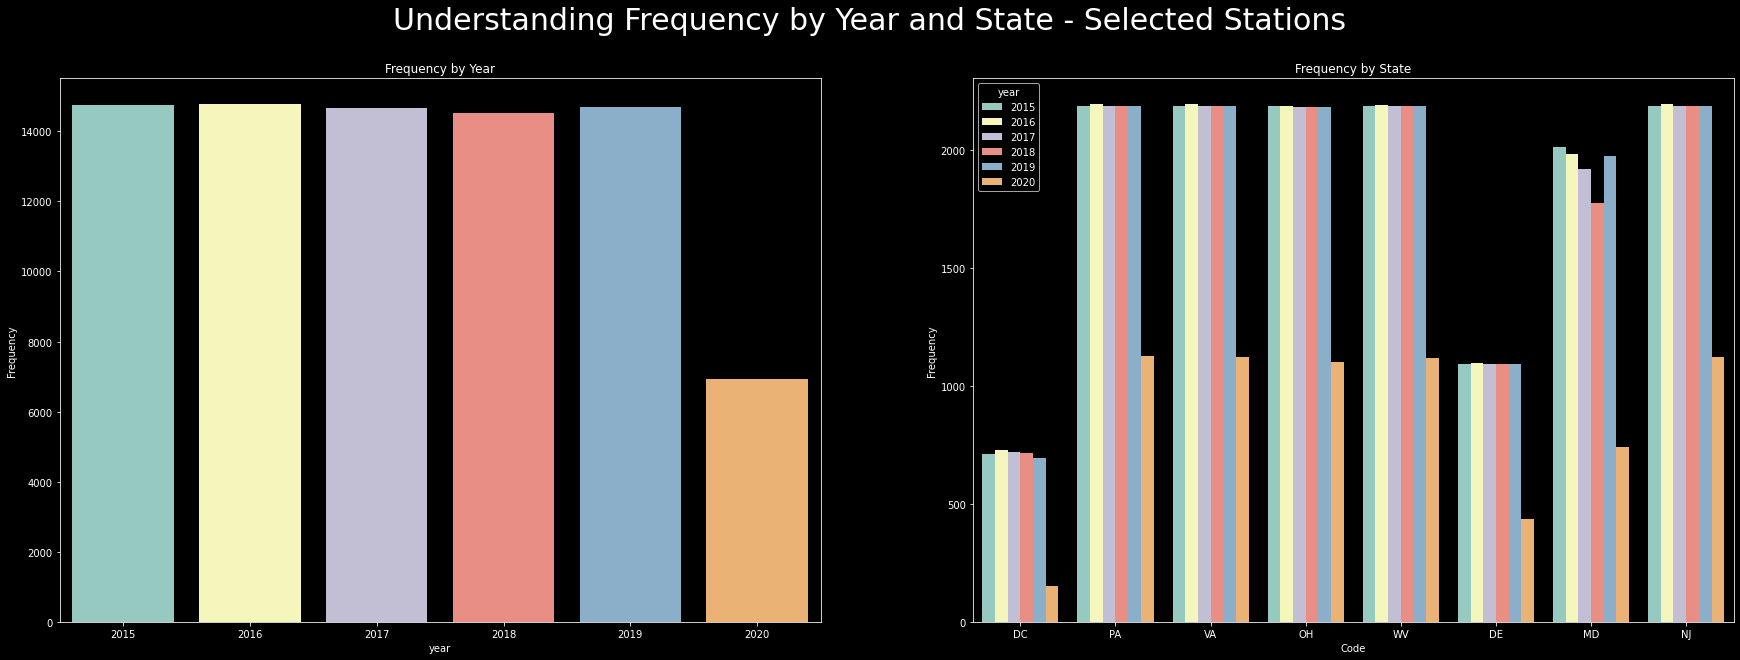

In [53]:
f, axes = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Understanding Frequency by Year and State - Selected Stations', fontsize=30)

ax = sns.countplot(x="year", data=df_NOAA_loco_visual,ax=axes[0])
ax.set_title('Frequency by Year')
ax.set_ylabel('Frequency')


ax = sns.countplot(x="Code", data=df_NOAA_loco_visual,hue='year',ax=axes[1])
ax.set_title('Frequency by State')
ax.set_ylabel('Frequency')


# Location of Selected Stations

In [54]:
map_drop_cols = 'year'
df_map = df_NOAA_loco_visual.drop(columns=map_drop_cols).groupby('station').mean()
import plotly.express as px

fig = px.scatter_mapbox(df_map, lat="latitude", lon="longitude", hover_name=df_map.index,hover_data=df_map.columns,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Outage Data

Link to Outage Regions:
https://emergencyprocedures.pjm.com/ep/pages/regions.jsf

The data below has been trimmed to only Actuals.  Actuals are when execution_date == forecast date.  We know that from the two lines from the PJM documenation. 


"This data contains the actual and scheduled megawatt generation outages for today and the next six days. In addition to providing total outages, the data show subtotals for each of the following outage types: unplanned (forced), maintenance, and planned." (https://dataminer2.pjm.com/feed/gen_outages_by_type/definition)


Our Goal is to Predict Forced Outage MW

##################################################################################################################

Definitions of Columns

forecast_execution_date_ept = When the forecast is published

forecast_date = What date is being forecasted (If execute and forecast date equal, then the line is an Actual

planned_outages_mw = Long Term Planning - planned_outages_mw - Planned = 30 days ahead/ Not pre determined duration (rescheduled plan outage turned into forced)

maintenance_outages_mw = Short Term Planning - At least 3 days ahead/ Pre determined duration/ Much shorter than planned outages

Forced Outages - Not Planned

##################################################################################################################



Target = Forced Outages

In [55]:
df_outage = pd.read_csv('UMBC_Energy/forecast_matched_execution.csv',index_col=[0])

df_outage = convert_dt(df_outage,col_name='forecast_execution_date_ept')
df_outage = get_month_season(df_outage)
df_outage

,forecast_execution_date_ept,forecast_date,region,total_outages_mw,planned_outages_mw,maintenance_outages_mw,forced_outages_mw,execution_date,forecast_just_date,date_match,plot_date,year,month,month_name,season
0,2015-12-31,2015-12-31,Mid Atlantic - Dominion,5063,1525,2827,711,12312015,12312015,yes,2015-12-31,2015,12,Dec,Winter
1,2015-12-31,2015-12-31,PJM RTO,15599,3696,6137,5766,12312015,12312015,yes,2015-12-31,2015,12,Dec,Winter
2,2015-12-31,2015-12-31,Western,10536,2171,3310,5055,12312015,12312015,yes,2015-12-31,2015,12,Dec,Winter
3,2015-12-30,2015-12-30,Mid Atlantic - Dominion,7178,1525,3873,1780,12302015,12302015,yes,2015-12-30,2015,12,Dec,Winter
4,2015-12-30,2015-12-30,PJM RTO,17116,3721,7481,5914,12302015,12302015,yes,2015-12-30,2015,12,Dec,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,2020-01-02,2020-01-02,Western,9459,495,6627,2337,1022020,1022020,yes,2020-01-02,2020,1,Jan,Winter
5573,2020-01-02,2020-01-02,PJM RTO,14364,964,8527,4873,1022020,1022020,yes,2020-01-02,2020,1,Jan,Winter
5574,2020-01-01,2020-01-01,Western,6735,495,4040,2200,1012020,1012020,yes,2020-01-01,2020,1,Jan,Winter
5575,2020-01-01,2020-01-01,Mid Atlantic - Dominion,6756,469,4424,1863,1012020,1012020,yes,2020-01-01,2020,1,Jan,Winter


# Only Western Outage Data is used from here and down

In [56]:
western = df_outage[df_outage['region'] == 'Western']
western = western.set_index('forecast_execution_date_ept').sort_index(ascending=True)

In [57]:
western.nunique()

forecast_date             1859
region                       1
total_outages_mw          1775
planned_outages_mw        1050
maintenance_outages_mw    1665
forced_outages_mw         1606
execution_date            1859
forecast_just_date        1859
date_match                   1
plot_date                 1859
year                         6
month                       12
month_name                  12
season                       4
dtype: int64

Link to Outage Regions:
https://emergencyprocedures.pjm.com/ep/pages/regions.jsf

The data below has been trimmed to only Actuals.  Actuals are when execution_date == forecast date.  We know that from the two lines from the PJM documenation. 


"This data contains the actual and scheduled megawatt generation outages for today and the next six days. In addition to providing total outages, the data show subtotals for each of the following outage types: unplanned (forced), maintenance, and planned." (https://dataminer2.pjm.com/feed/gen_outages_by_type/definition)

##################################################################################################################

Definitions of Columns

forecast_execution_date_ept = When the forecast is published

forecast_date = What date is being forecasted (If execute and forecast date equal, then the line is an Actual

planned_outages_mw = Long Term Planning - planned_outages_mw - Planned = 30 days ahead/ Not pre determined duration (rescheduled plan outage turned into forced)

maintenance_outages_mw = Short Term Planning - At least 3 days ahead/ Pre determined duration/ Much shorter than planned outages

Forced Outages - Not Planned
planned_outages_mw = Long Term Planning - planned_outages_mw - Planned = 30 days ahead/ Not pre determined duration (rescheduled plan outage turned into forced)

maintenance_outages_mw = Short Term Planning - At least 3 days ahead/ Pre determined duration/ Much shorter than planned outages

Forced Outages - Not Planned

#################################################################################################################

Target = Forced Outages

## Set Data for Outage Plots Below

In [58]:
#Guidance for Options of Columns of Value to plot
plot_main = ['total_outages_mw','planned_outages_mw','maintenance_outages_mw','forced_outages_mw']

#Used by Each Plot
plot_col = ['year','forced_outages_mw','maintenance_outages_mw','month_name','season']

plot_year = 2019

df_western_plot = western[plot_col]

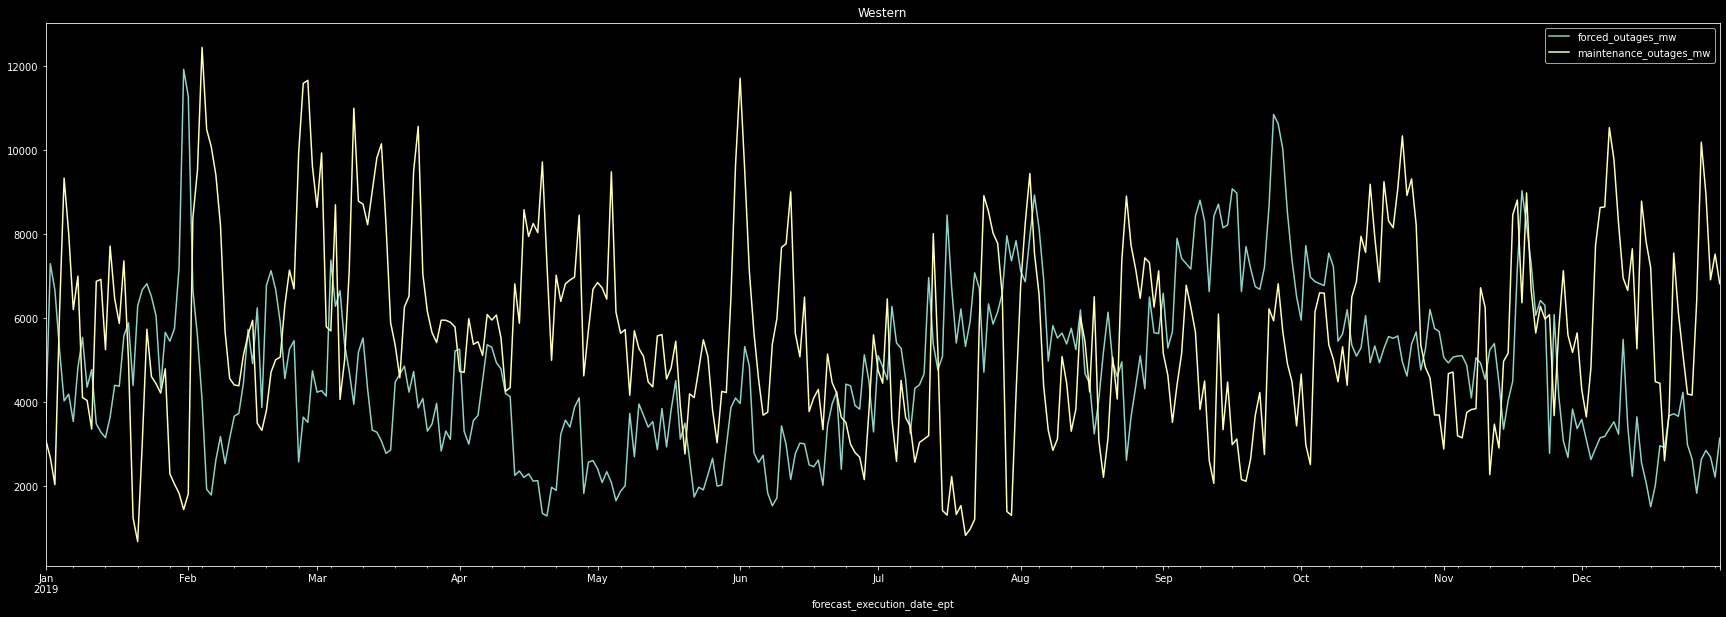

In [59]:
df_western_plot[df_western_plot.year == str(plot_year)].plot(title= 'Western',figsize=(30,10))

## Top and Bottom NOAA Plot State and Year

In [60]:
top_state = "WV"
top_data = df_NOAA_loco_visual.query(f'Code == "{top_state}" & year == "{plot_year}" ')

bottom_state = "OH"
bottom_data = df_NOAA_loco_visual.query(f'Code == "{bottom_state}" & year == "{plot_year}"')



## Reuse plot below for all weather features

In [61]:
weather_features = ['PRCP','SNOW','SNWD','AWND','TMAX','TMIN']

## PRCP

Text(0.5, 1.0, 'OH')

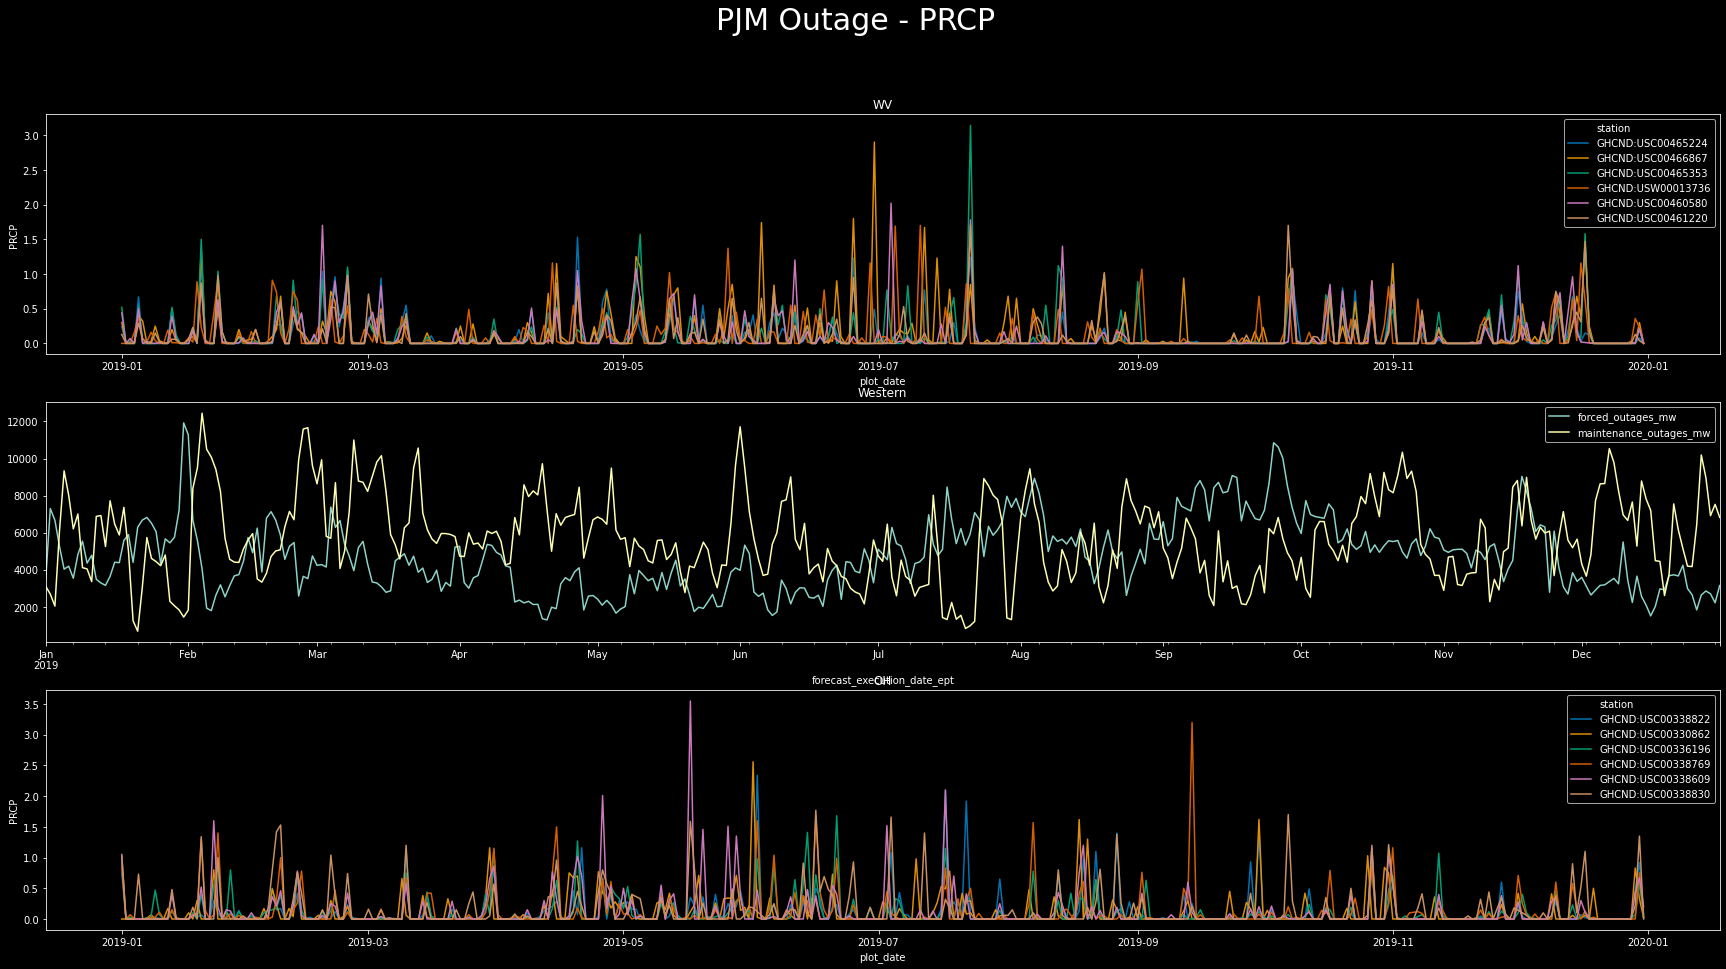

In [62]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - PRCP', fontsize=30)


sns.lineplot(x='plot_date',y='PRCP',data=top_data,hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')



df_western_plot[df_western_plot.year == str(plot_year)].plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='PRCP',data=bottom_data,hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


## **Set Month and Year for Visual Below**

In [63]:
plot_month = 'Jan'
plot_year = 2019

Text(0.5, 1.0, 'OH')

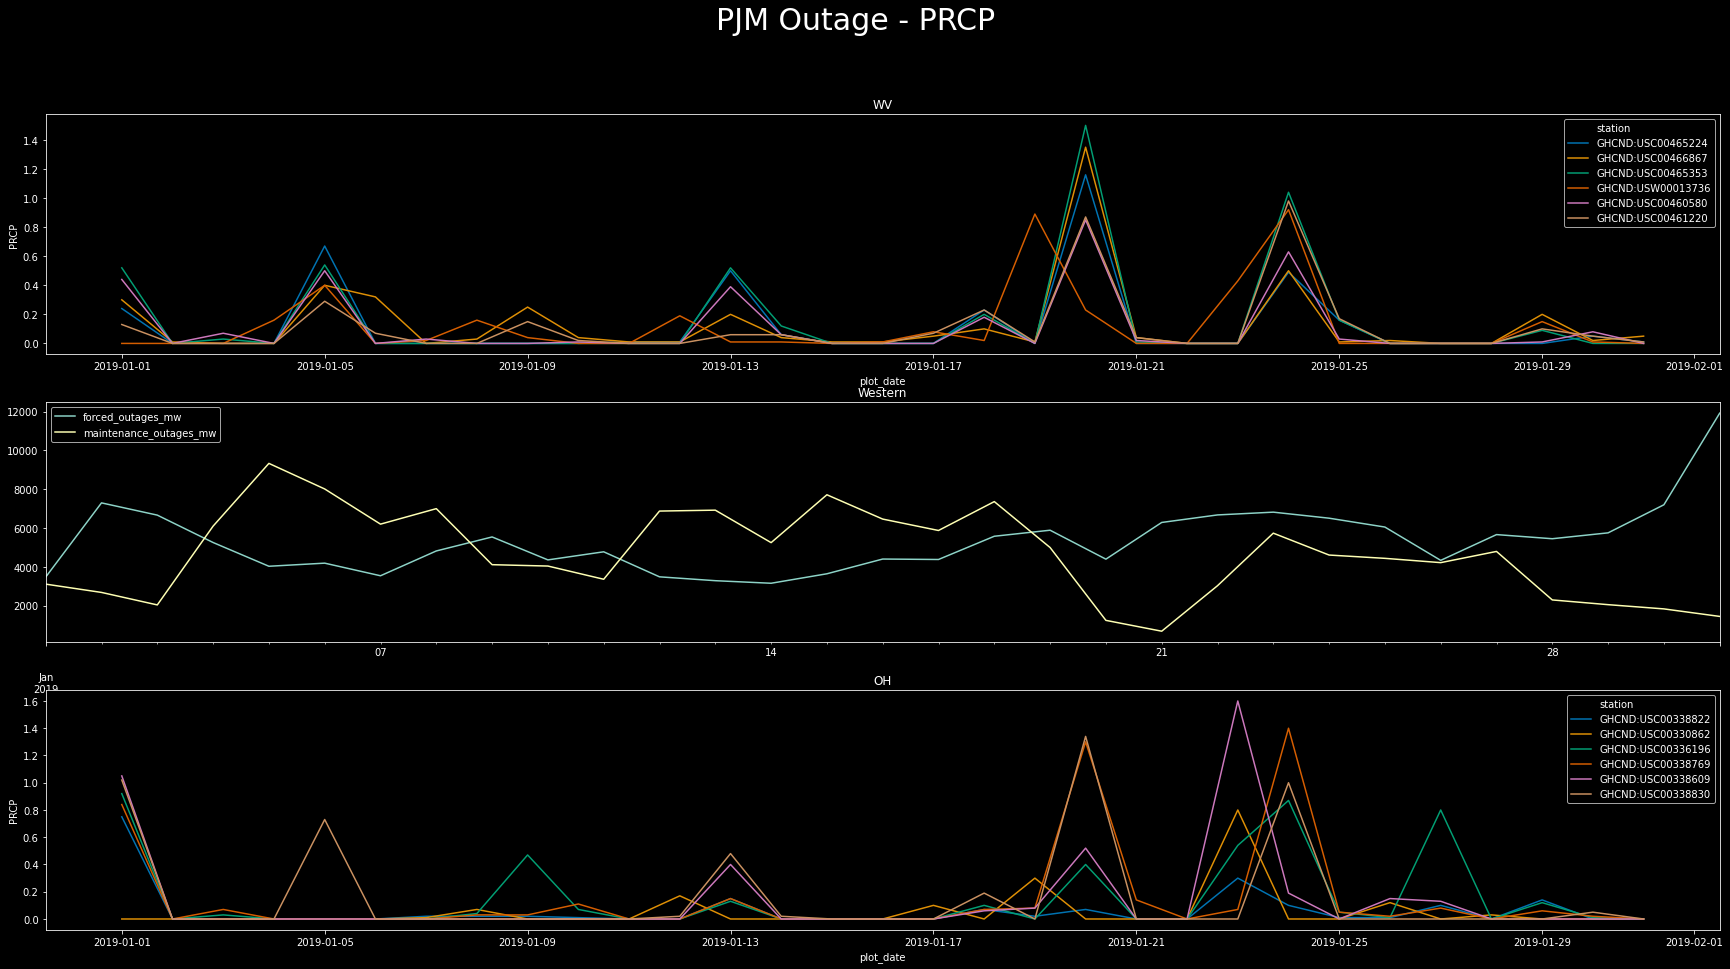

In [64]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - PRCP', fontsize=30)

sns.lineplot(x='plot_date',y='PRCP',data=top_data.query(f'year == "{plot_year}" & month_name == "{plot_month}"'),hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')


df_western_plot.query(f'year == "{plot_year}" & month_name == "{plot_month}"').plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='PRCP',data=bottom_data.query(f'year == "{plot_year}" & month_name == "{plot_month}"'),hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


## **For Visuals Below: Row amount for top_data and bottom_data will be the row count of outage data times the value found in the station column for the respective code**

In [65]:
df_NOAA_loco_visual[['Code','station']].groupby('Code').nunique('station')

,Code,station
Code,,
DC,1,2
DE,1,3
MD,1,6
NJ,1,6
OH,1,6
PA,1,6
VA,1,6
WV,1,6


Text(0.5, 1.0, 'OH')

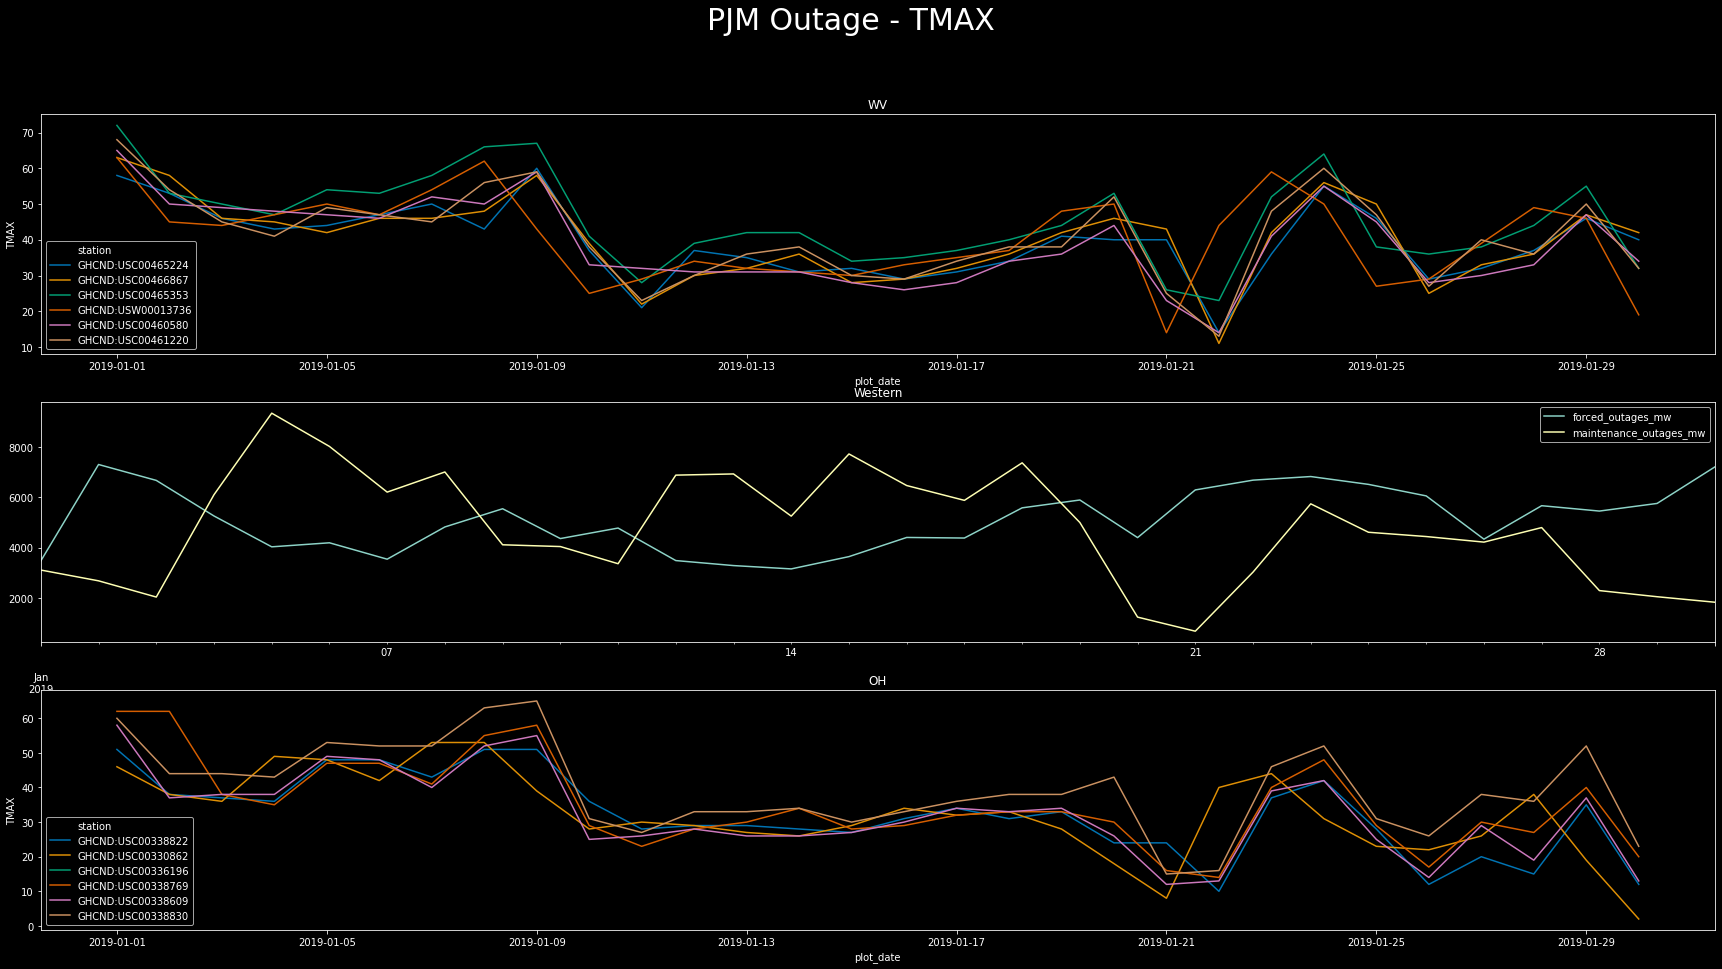

In [66]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - TMAX', fontsize=30)

sns.lineplot(x='plot_date',y='TMAX',data=top_data.head(180),hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')



df_western_plot[df_western_plot.year == str(plot_year)].head(30).plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='TMAX',data=bottom_data.head(180),hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


Text(0.5, 1.0, 'OH')

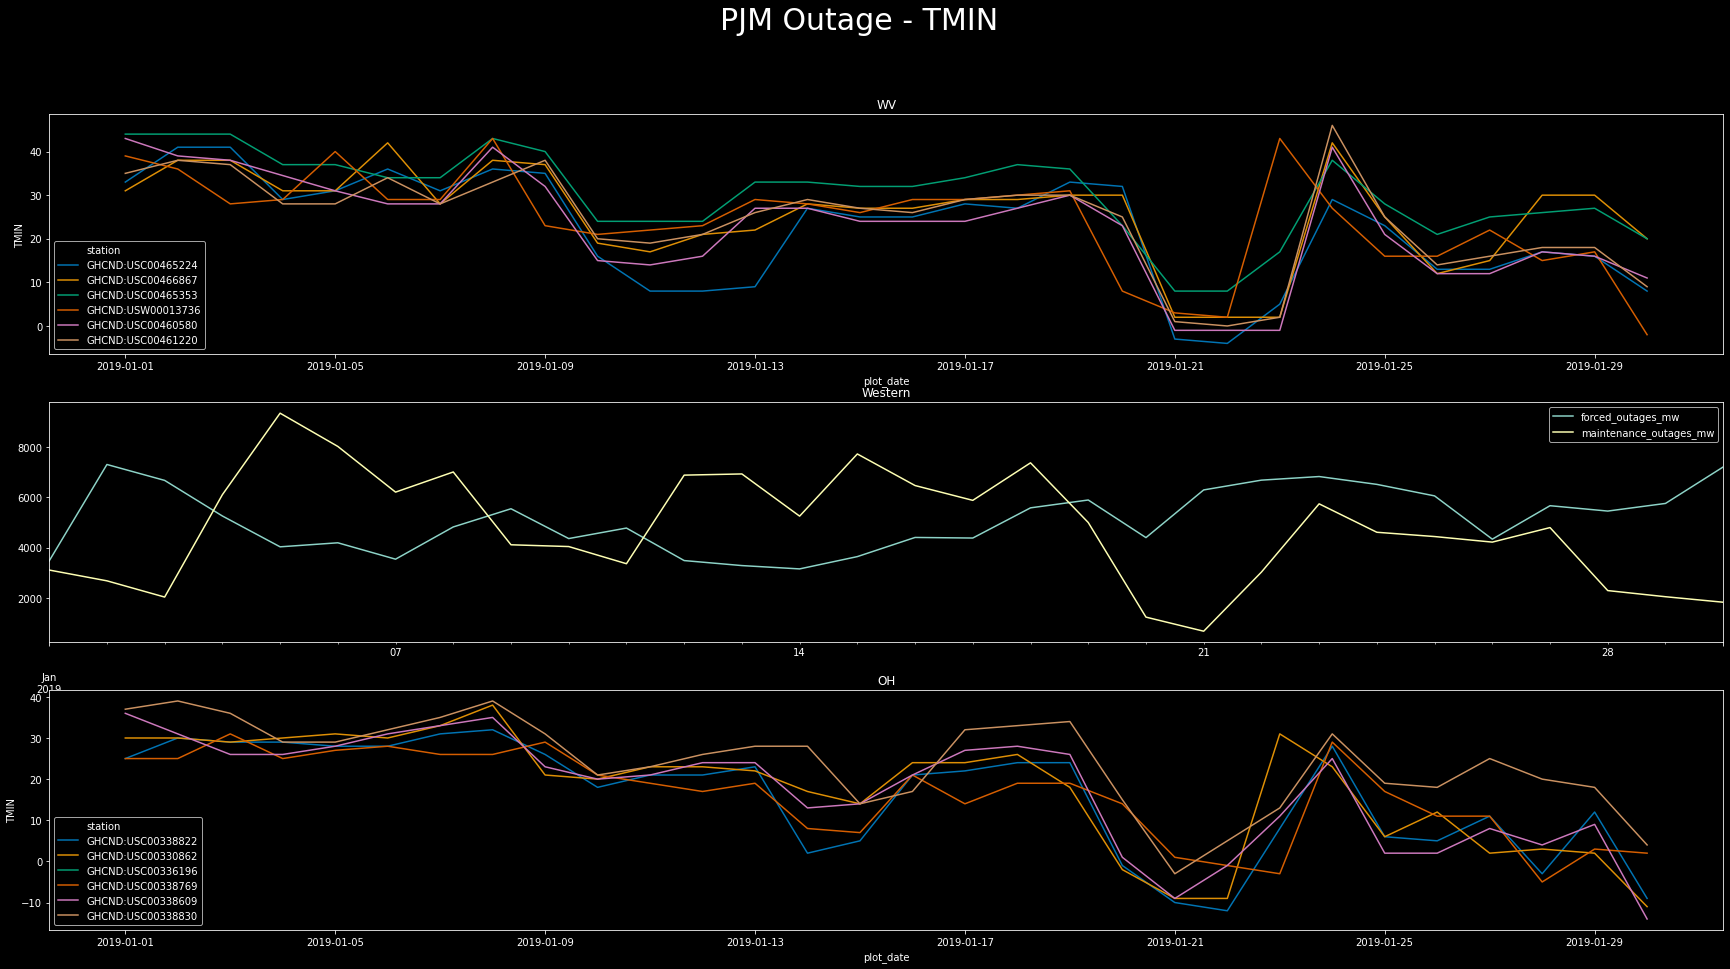

In [67]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - TMIN', fontsize=30)

sns.lineplot(x='plot_date',y='TMIN',data=top_data.head(180),hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')



df_western_plot[df_western_plot.year == str(plot_year)].head(30).plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='TMIN',data=bottom_data.head(180),hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


Text(0.5, 1.0, 'OH')

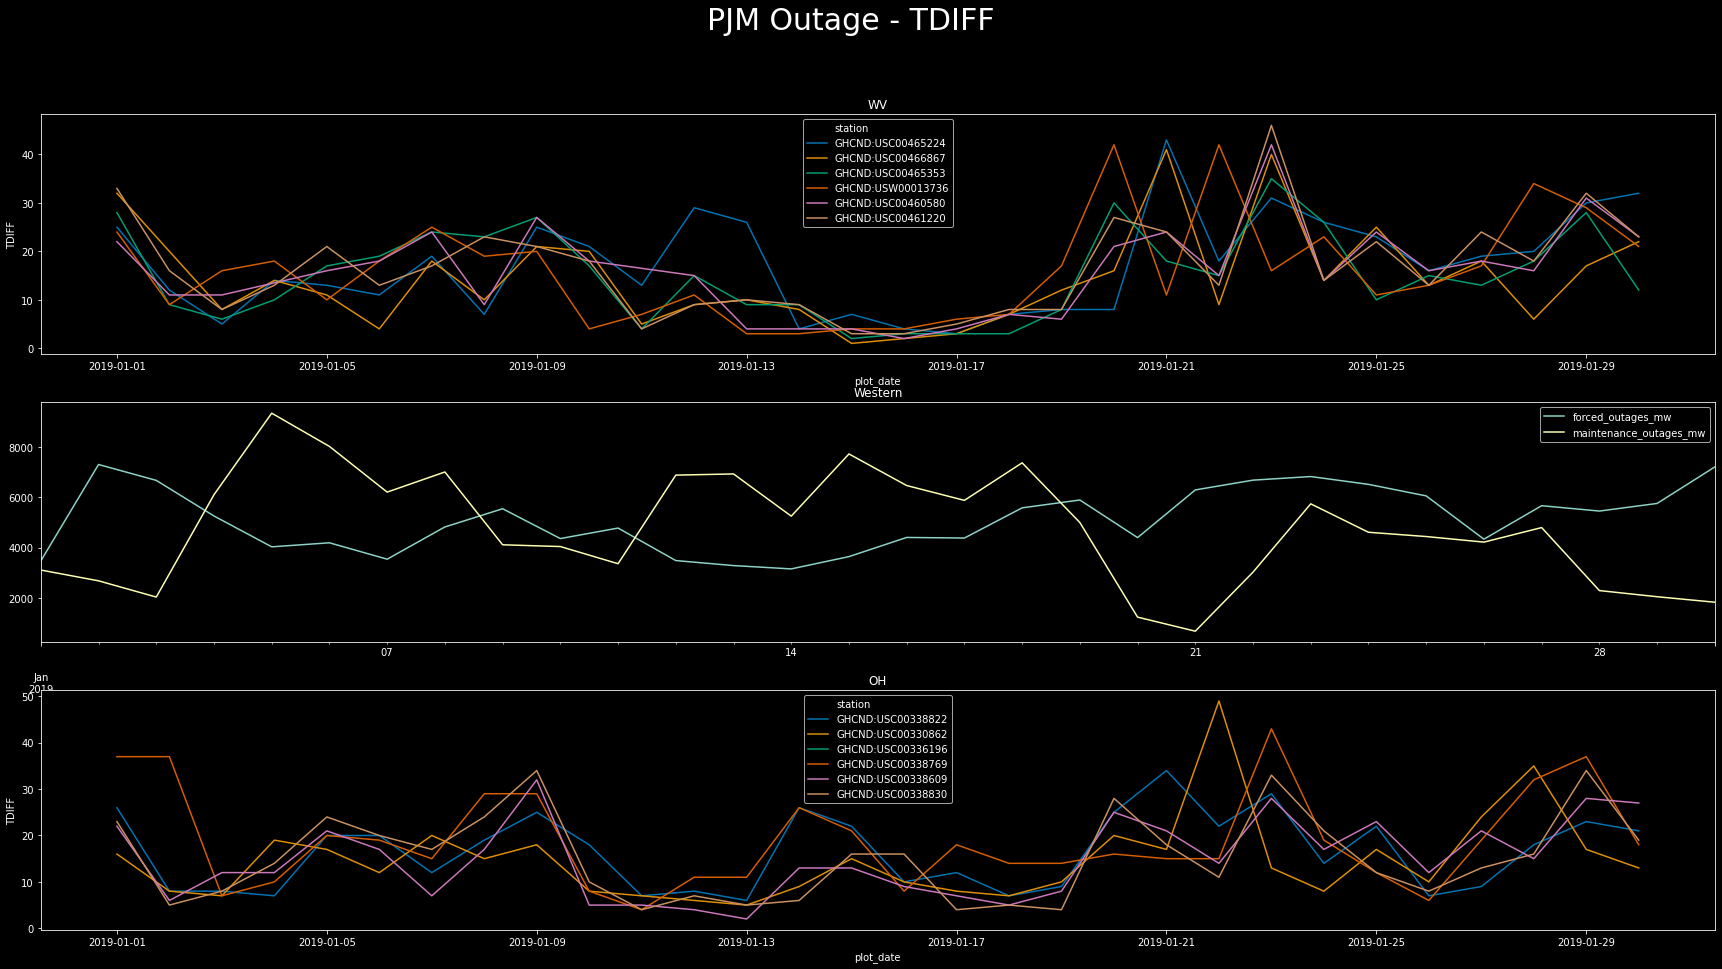

In [68]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - TDIFF', fontsize=30)

sns.lineplot(x='plot_date',y='TDIFF',data=top_data.head(180),hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')



df_western_plot[df_western_plot.year == str(plot_year)].head(30).plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='TDIFF',data=bottom_data.head(180),hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


Text(0.5, 1.0, 'OH')

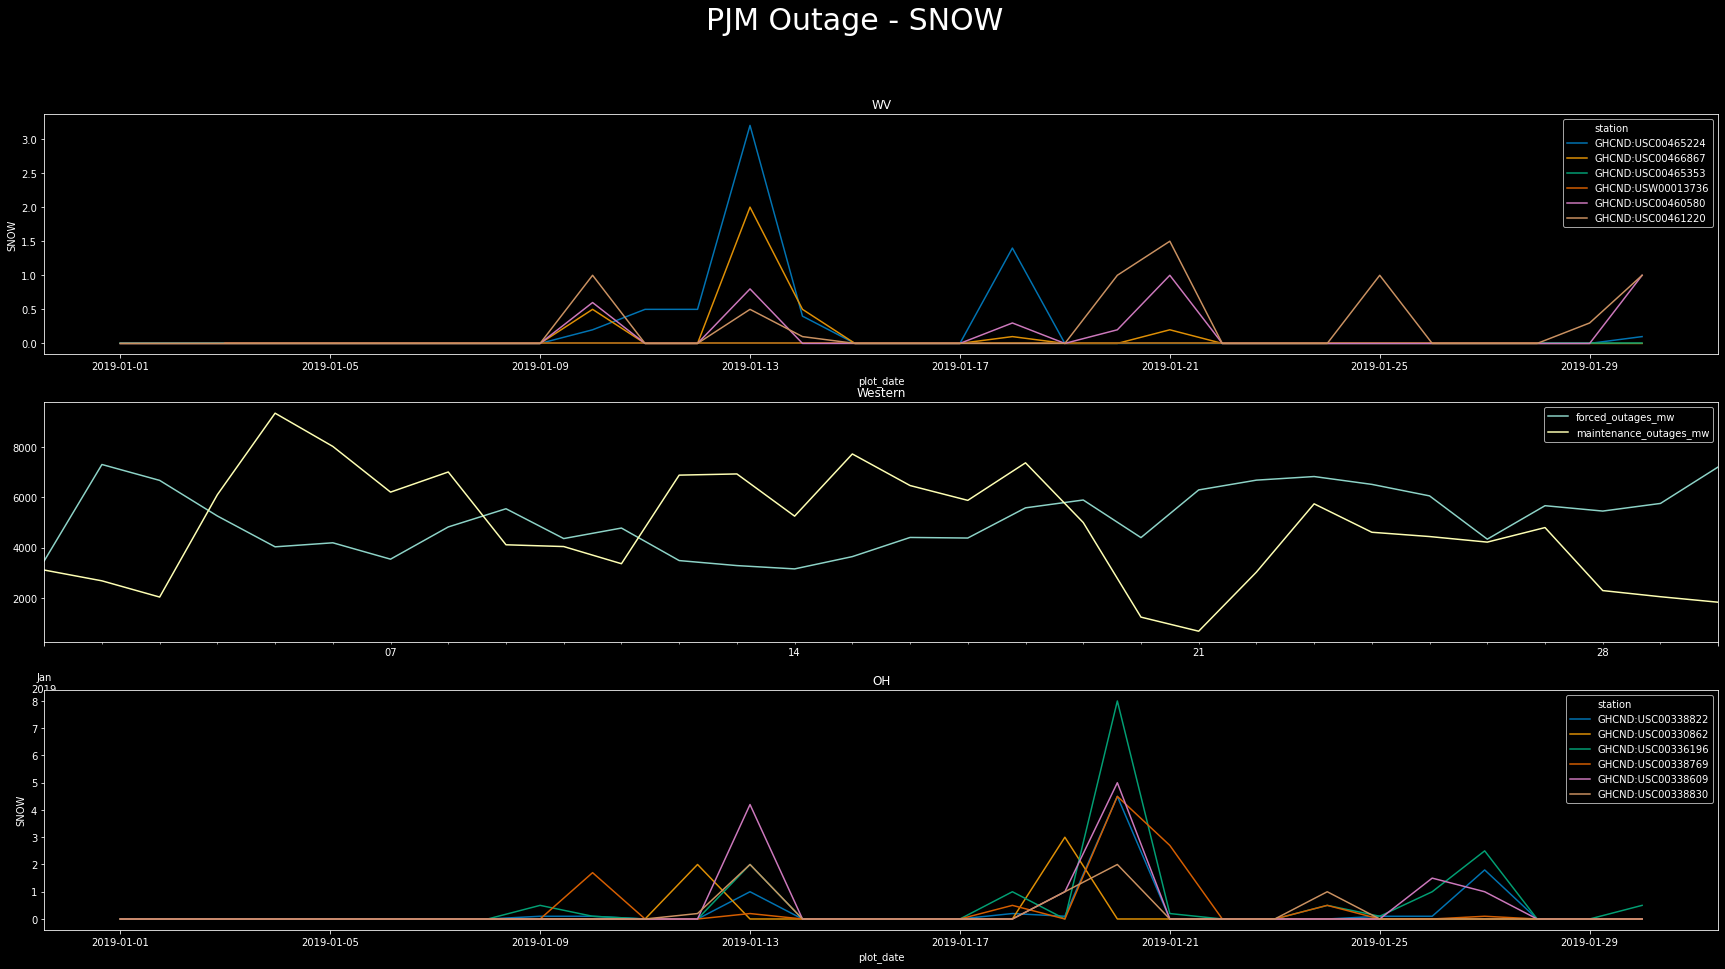

In [69]:
f, axes = plt.subplots(3, 1, figsize=(30, 15))
f.suptitle(f'PJM Outage - SNOW', fontsize=30)

sns.lineplot(x='plot_date',y='SNOW',data=top_data.head(180),hue='station',ax=axes[0],palette='colorblind').set_title(f'{top_state}')



df_western_plot[df_western_plot.year == str(plot_year)].head(30).plot(title= 'Western',ax=axes[1])


sns.lineplot(x='plot_date',y='SNOW',data=bottom_data.head(180),hue='station',ax=axes[2],palette='colorblind').set_title(f'{bottom_state}')


# Usage Data

In [70]:
## The cell below takes a couple minutes to run

df_usage_2015 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2015')
df_usage_2016 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2016')
df_usage_2017 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2017')
df_usage_2018 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2018')
df_usage_2019 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2019')
df_usage_2020 = pd.read_excel('UMBC_Energy/Energy_usage/Usage_2015_2020.xlsx', 'hrl_load_metered_2020')
df_usage = pd.concat([df_usage_2015,df_usage_2016,df_usage_2017,df_usage_2018,df_usage_2019,df_usage_2020])
df_usage = convert_dt(df_usage, name='datetime_beginning_utc')
df_usage = df_usage.set_index('datetime_beginning_utc')

df_usage.groupby('mkt_region').sum()

df_usage[df_usage.mkt_region != 'RTO'].plot(subplots=True,title= 'PJM Usage Total',figsize=(20, 20))